In [2541]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2542]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')

# 음수 기호 설정 (한글 폰트와 함께 깨지지 않도록 처리)
plt.rcParams['axes.unicode_minus'] = False

In [2543]:
train=pd.read_csv("./data/train.csv")
test=pd.read_csv('./data/test.csv')

### 1. 시술 시기 코드

In [2545]:
train['시술 시기 코드'].value_counts()

시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

In [2546]:
test['시술 시기 코드'].value_counts()

시술 시기 코드
TRDQAZ    13610
TRCMWS    13392
TRYBLT    12929
TRZKPL    12793
TRJXFG    12764
TRVNRY    12560
TRXQMD    12019
Name: count, dtype: int64

In [2547]:
a=pd.crosstab(train['시술 시기 코드'], train['임신 성공 여부'],margins=True)
b=pd.crosstab(train['시술 시기 코드'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
시술 시기 코드,,,,,
TRCMWS,28285,9805,38090,0.742583,0.257417
TRDQAZ,29405,9564,38969,0.754574,0.245426
TRJXFG,26437,9594,36031,0.733729,0.266271
TRVNRY,26776,9397,36173,0.740221,0.259779
TRXQMD,25910,8921,34831,0.743878,0.256122
TRYBLT,26834,9879,36713,0.730913,0.269087
TRZKPL,26476,9068,35544,0.744880,0.255120
All,190123,66228,256351,NaN,NaN


각 시술 시기 별 데이터의 개수가 유사하며, 임신 성공 확률 역시 비교적 유사하게 나타남. ->원-핫 인코딩

### 2. 시술 당시 나이

In [2550]:
train['시술 당시 나이'].value_counts()

시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64

In [2551]:
a=pd.crosstab(train['시술 당시 나이'], train['임신 성공 여부'],margins=True)
b=pd.crosstab(train['시술 당시 나이'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
시술 당시 나이,,,,,
만18-34세,69415,33061,102476,0.677378,0.322622
만35-37세,41694,16086,57780,0.721599,0.278401
만38-39세,30725,8522,39247,0.782862,0.217138
만40-42세,31395,5953,37348,0.840607,0.159393
만43-44세,10807,1446,12253,0.881988,0.118012
만45-50세,5758,1160,6918,0.832321,0.167679
알 수 없음,329,0,329,1.000000,0.000000
All,190123,66228,256351,NaN,NaN


null값이 존재하진 않으나 대신 '알 수 없음'이라는 값으로 대체 되어 있음. 이 데이터는 임신 성공 확률이 0에 가까우므로, 최빈값이 아닌,
임신 성공률이 제일 낮은 만 43-44세로 대체

In [2553]:
train.loc[train['시술 당시 나이'] == '알 수 없음', '시술 당시 나이'] = '만 43-44세'


In [2554]:
test['시술 당시 나이'].value_counts()

시술 당시 나이
만18-34세    36178
만35-37세    20211
만38-39세    13611
만40-42세    13266
만43-44세     4272
만45-50세     2413
알 수 없음       116
Name: count, dtype: int64

In [2555]:
test.loc[test['시술 당시 나이']=='알 수 없음', '시술 당시 나이']='만 43-44세'

나이는 라벨 인코딩 사용하기

### 3. 임신 시도 또는 마지막 임신 경과 연수

In [2558]:
train.drop(columns='임신 시도 또는 마지막 임신 경과 연수', inplace=True)

In [2559]:
test.drop(columns='임신 시도 또는 마지막 임신 경과 연수', inplace=True)

존재하는 데이터에 비해 결측치가 훨씬 많으므로 삭제

### 4. 시술 유형

In [2562]:
train['시술 유형'].value_counts()

시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

In [2563]:
test['시술 유형'].value_counts()

시술 유형
IVF    87891
DI      2176
Name: count, dtype: int64

In [2564]:
a=pd.crosstab(train['시술 유형'], train['임신 성공 여부'],margins=True)
b=pd.crosstab(train['시술 유형'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
시술 유형,,,,,
DI,5480,811,6291,0.871086,0.128914
IVF,184643,65417,250060,0.738395,0.261605
All,190123,66228,256351,NaN,NaN


얘는 원-핫

### 5. 특정 시술 유형

In [2567]:
train['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
IVF / AH:ICSI / AH                          2
GIFT                     

In [2568]:
# ":"가 포함된 경우, 첫 번째 값만 남기기 (float값이 있으면 그대로 두기)
train['특정 시술 유형'] = train['특정 시술 유형'].apply(lambda x: x.split(':')[0] if isinstance(x, str) else x)

# 결과 확인
train['특정 시술 유형'].value_counts()


특정 시술 유형
ICSI                  125762
IVF                    93393
Unknown                26939
IUI                     6100
ICSI / BLASTOCYST       1614
IVF / BLASTOCYST        1248
ICSI / AH                771
IVF / AH                 321
ICI                       96
Generic DI                71
IVI                       23
ICSI / BLASTOCYST          6
FER                        3
GIFT                       2
Name: count, dtype: int64

In [2569]:
# ":"가 포함된 경우, 첫 번째 값만 남기기 (float값이 있으면 그대로 두기)
test['특정 시술 유형'] = test['특정 시술 유형'].apply(lambda x: x.split(':')[0] if isinstance(x, str) else x)

# 결과 확인
test['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                  44400
IVF                   32931
Unknown                9216
IUI                    2114
ICSI / BLASTOCYST       584
IVF / BLASTOCYST        389
ICSI / AH               264
IVF / AH                105
ICI                      28
Generic DI               26
IVI                       8
ICSI / BLASTOCYST         2
Name: count, dtype: int64

In [2570]:
train.loc[train['특정 시술 유형'].isin(['ICI', 'Generic DI', 'IVI', 'ICSI / BLASTOCYST','FER','GIFT']), '특정 시술 유형'] = '기타'


In [2571]:
test.loc[test['특정 시술 유형'].isin(['ICI', 'Generic DI', 'IVI', 'ICSI / BLASTOCYST']), '특정 시술 유형'] = '기타'


세부 수술 정보 삭제 후 주요 수술 정보만 남김.

100개 이하인 수술은 기타로 너무 많은 변수가 생기는 것 방지 

-> 원핫 인코딩 하기

In [2573]:
a=pd.crosstab(train['특정 시술 유형'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['특정 시술 유형'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
특정 시술 유형,,,,,
ICSI,92128,33634,125762,0.732558,0.267442
ICSI / AH,603,168,771,0.782101,0.217899
ICSI / BLASTOCYST,1038,576,1614,0.643123,0.356877
IUI,5316,784,6100,0.871475,0.128525
IVF,69263,24130,93393,0.741629,0.258371
IVF / AH,262,59,321,0.816199,0.183801
IVF / BLASTOCYST,791,457,1248,0.633814,0.366186
Unknown,20549,6390,26939,0.762797,0.237203
기타,171,30,201,0.850746,0.149254


In [2574]:
# '특정 시술 유형' 컬럼이 존재하는지 확인하고, NaN 값을 'Unknown'으로 채우기
train['특정 시술 유형'] = train['특정 시술 유형'].fillna('Unknown')


In [2575]:
test['특정 시술 유형'] = test['특정 시술 유형'].fillna('Unknown')


Unknown은 일단 보류

### 6. 배란 자극 여부

In [2578]:
train['배란 자극 여부'].value_counts()

배란 자극 여부
1    197720
0     58631
Name: count, dtype: int64

자료형이 int hmm

### 7. 배란 유도 유형

In [2581]:
train['배란 유도 유형'].value_counts()

배란 유도 유형
기록되지 않은 시행      194432
알 수 없음           61917
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
Name: count, dtype: int64

In [2582]:
test['배란 유도 유형'].value_counts()

배란 유도 유형
기록되지 않은 시행    68599
알 수 없음        21468
Name: count, dtype: int64

In [2583]:
a=pd.crosstab(train['배란 유도 유형'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['배란 유도 유형'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
배란 유도 유형,,,,,
기록되지 않은 시행,142245,52187,194432,0.731593,0.268407
생식선 자극 호르몬,0,1,1,0.000000,1.000000
세트로타이드 (억제제),1,0,1,1.000000,0.000000
알 수 없음,47877,14040,61917,0.773245,0.226755
All,190123,66228,256351,NaN,NaN


In [2584]:
train.loc[train['배란 유도 유형'].isin(['생식선 자극 호르몬', '세트로타이드 (억제제)']), '배란 유도 유형'] = '기록되지 않은 시행'

매우 극소수인 값들이기에 기록되지 않은 시행으로 변경

In [2586]:
a=pd.crosstab(train['배란 유도 유형'],train['배란 자극 여부'], margins=True)
a

배란 자극 여부,0,1,All
배란 유도 유형,,,
기록되지 않은 시행,0,194434,194434
알 수 없음,58631,3286,61917
All,58631,197720,256351


배란 자극 여부가 1인 사람들이 모두 기록되지 않은 시행으로 적혀 있으며, 변수 개수, 유사성이 매우 높음 -> 배란 유도 유형 변수 삭제

In [2588]:
train.drop(columns='배란 유도 유형', inplace=True)

In [2589]:
test.drop(columns='배란 유도 유형', inplace=True)

### 8. 단일 배아 이식 여부

In [2591]:
train['단일 배아 이식 여부'].value_counts()

단일 배아 이식 여부
0.0    191677
1.0     58383
Name: count, dtype: int64

In [2592]:
test['단일 배아 이식 여부'].value_counts()

단일 배아 이식 여부
0.0    67431
1.0    20460
Name: count, dtype: int64

### 9. 착상 전 유전 검사 사용 여부

In [2594]:
train.drop(columns='착상 전 유전 검사 사용 여부',inplace=True)
test.drop(columns='착상 전 유전 검사 사용 여부',inplace=True)

### 10. 남성 주 불임 원인

In [2596]:
train['남성 주 불임 원인'].value_counts()

남성 주 불임 원인
0    249041
1      7310
Name: count, dtype: int64

In [2597]:
test['남성 주 불임 원인'].value_counts()

남성 주 불임 원인
0    87459
1     2608
Name: count, dtype: int64

In [2598]:
a=pd.crosstab(train['남성 주 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['남성 주 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
남성 주 불임 원인,,,,,
0,184421,64620,249041,0.740525,0.259475
1,5702,1608,7310,0.780027,0.219973
All,190123,66228,256351,NaN,NaN


이게 임신 여부와 상관이 있을까?

### 11. 남성 부 불임 원인

In [2601]:
train['남성 부 불임 원인'].value_counts()

남성 부 불임 원인
0    252989
1      3362
Name: count, dtype: int64

In [2602]:
test['남성 부 불임 원인'].value_counts()

남성 부 불임 원인
0    88908
1     1159
Name: count, dtype: int64

In [2603]:
a=pd.crosstab(train['남성 부 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['남성 부 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
남성 부 불임 원인,,,,,
0,187425,65564,252989,0.740842,0.259158
1,2698,664,3362,0.802499,0.197501
All,190123,66228,256351,NaN,NaN


In [2604]:
a=pd.crosstab(train['남성 주 불임 원인'],train['남성 부 불임 원인'], margins=True)
b=pd.crosstab(train['남성 주 불임 원인'], train['남성 부 불임 원인'],normalize='index')
pd.concat([a,b],axis=True)

남성 부 불임 원인,0,1,All,0,1
남성 주 불임 원인,,,,,
0,245682,3359,249041,0.986512,0.013488
1,7307,3,7310,0.999590,0.000410
All,252989,3362,256351,NaN,NaN


### 12. 여성 주 불임 원인

In [2606]:
train['여성 주 불임 원인'].value_counts()

여성 주 불임 원인
0    248475
1      7876
Name: count, dtype: int64

In [2607]:
a=pd.crosstab(train['여성 주 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['여성 주 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
여성 주 불임 원인,,,,,
0,183973,64502,248475,0.740408,0.259592
1,6150,1726,7876,0.780853,0.219147
All,190123,66228,256351,NaN,NaN


### 13. 여성 부 불임 원인

In [2609]:
train['여성 부 불임 원인'].value_counts()

여성 부 불임 원인
0    253164
1      3187
Name: count, dtype: int64

In [2610]:
test['여성 부 불임 원인'].value_counts()

여성 부 불임 원인
0    88930
1     1137
Name: count, dtype: int64

In [2611]:
a=pd.crosstab(train['여성 부 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['여성 부 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
여성 부 불임 원인,,,,,
0,187560,65604,253164,0.740864,0.259136
1,2563,624,3187,0.804205,0.195795
All,190123,66228,256351,NaN,NaN


In [2612]:
a=pd.crosstab(train['여성 주 불임 원인'],train['여성 부 불임 원인'], margins=True)
b=pd.crosstab(train['여성 주 불임 원인'], train['여성 부 불임 원인'],normalize='index')
pd.concat([a,b],axis=True)

여성 부 불임 원인,0,1,All,0,1
여성 주 불임 원인,,,,,
0,245295,3180,248475,0.987202,0.012798
1,7869,7,7876,0.999111,0.000889
All,253164,3187,256351,NaN,NaN


### 14. 부부 주 불임 원인

In [2614]:
train['부부 주 불임 원인'].value_counts()

부부 주 불임 원인
0    247874
1      8477
Name: count, dtype: int64

In [2615]:
test['부부 주 불임 원인'].value_counts()

부부 주 불임 원인
0    87067
1     3000
Name: count, dtype: int64

In [2616]:
a=pd.crosstab(train['부부 주 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['부부 주 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
부부 주 불임 원인,,,,,
0,183513,64361,247874,0.740348,0.259652
1,6610,1867,8477,0.779757,0.220243
All,190123,66228,256351,NaN,NaN


### 15. 부부 부 불임 원인

In [2618]:
train['부부 부 불임 원인'].value_counts()

부부 부 불임 원인
0    254104
1      2247
Name: count, dtype: int64

In [2619]:
test['부부 부 불임 원인'].value_counts()

부부 부 불임 원인
0    89286
1      781
Name: count, dtype: int64

In [2620]:
a=pd.crosstab(train['부부 부 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['부부 부 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
부부 부 불임 원인,,,,,
0,188296,65808,254104,0.741019,0.258981
1,1827,420,2247,0.813084,0.186916
All,190123,66228,256351,NaN,NaN


In [2621]:
a=pd.crosstab(train['부부 주 불임 원인'],train['부부 부 불임 원인'], margins=True)
b=pd.crosstab(train['부부 주 불임 원인'], train['부부 부 불임 원인'],normalize='index')
pd.concat([a,b],axis=True)

부부 부 불임 원인,0,1,All,0,1
부부 주 불임 원인,,,,,
0,245633,2241,247874,0.990959,0.009041
1,8471,6,8477,0.999292,0.000708
All,254104,2247,256351,NaN,NaN


### 17. 불명확 불임 원인

In [2623]:
train['불명확 불임 원인'].value_counts()

불명확 불임 원인
0    192076
1     64275
Name: count, dtype: int64

In [2624]:
test['불명확 불임 원인'].value_counts()

불명확 불임 원인
0    67458
1    22609
Name: count, dtype: int64

In [2625]:
a=pd.crosstab(train['불명확 불임 원인'],train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불명확 불임 원인'], train['임신 성공 여부'],normalize='index')
pd.concat([a,b],axis=True)

임신 성공 여부,0,1,All,0,1
불명확 불임 원인,,,,,
0,142525,49551,192076,0.742024,0.257976
1,47598,16677,64275,0.740537,0.259463
All,190123,66228,256351,NaN,NaN


In [2626]:
import scipy.stats as stats

# 카이제곱 검정 수행
contingency_table = pd.crosstab(train['불명확 불임 원인'], train['임신 성공 여부'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 검정 p-value: {p}")


카이제곱 검정 p-value: 0.4590494930517375


불명확 불임 원인을 가진 환자와 가지지 않은 환자의 임신 성공 여부가 매우 유사하게 나타나고 있으며, p값 역시 0.45이상으로 기준치인 0.05보다 높으므로 변수 삭제

In [2628]:
train.drop(columns='불명확 불임 원인',inplace=True)
test.drop(columns='불명확 불임 원인',inplace=True)

### 18. 불임 원인 - 난관 질환

In [2630]:
train['불임 원인 - 난관 질환'].value_counts()

불임 원인 - 난관 질환
0    220794
1     35557
Name: count, dtype: int64

In [2631]:
test['불임 원인 - 난관 질환'].value_counts()

불임 원인 - 난관 질환
0    77687
1    12380
Name: count, dtype: int64

In [2632]:
a=pd.crosstab(train['불임 원인 - 난관 질환'], train['임신 성공 여부'])
b=pd.crosstab(train['불임 원인 - 난관 질환'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,0,1
불임 원인 - 난관 질환,,,,
0,163731,57063,0.741555,0.258445
1,26392,9165,0.742245,0.257755


In [2633]:
import scipy.stats as stats

# 카이제곱 검정 수행
contingency_table = pd.crosstab(train['불임 원인 - 난관 질환'], train['임신 성공 여부'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 검정 p-value: {p}")

카이제곱 검정 p-value: 0.7878696502420042


이 변수 역시 난관 질환 여부가 다름에도 임신 성공 여부가 매우 유사하게 나타나고 있으며, p값이 0.78로 매우 높게 나타나고 있으므로 제거하겠다.

In [2635]:
train.drop(columns='불임 원인 - 난관 질환',inplace=True)

In [2636]:
test.drop(columns='불임 원인 - 난관 질환',inplace=True)

### 19. 불임 원인 - 남성 요인

In [2638]:
a=pd.crosstab(train['불임 원인 - 남성 요인'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 남성 요인'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 남성 요인,,,,,
0,121377,39508,160885,0.754433,0.245567
1,68746,26720,95466,0.720110,0.279890
All,190123,66228,256351,NaN,NaN


### 20. 불임 원인 - 배란 장애

In [2640]:
a=pd.crosstab(train['불임 원인 - 배란 장애'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 배란 장애'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 배란 장애,,,,,
0,166278,56647,222925,0.745892,0.254108
1,23845,9581,33426,0.713367,0.286633
All,190123,66228,256351,NaN,NaN


### 21. 불임 원인 - 여성 요인

In [2642]:
a=pd.crosstab(train['불임 원인 - 여성 요인'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 여성 요인'], train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 여성 요인,,,,,
0,190123,66228,256351,0.741651,0.258349
All,190123,66228,256351,NaN,NaN


In [2643]:
train['불임 원인 - 여성 요인'].value_counts()

불임 원인 - 여성 요인
0    256351
Name: count, dtype: int64

In [2644]:
test['불임 원인 - 여성 요인'].value_counts()

불임 원인 - 여성 요인
0    90067
Name: count, dtype: int64

In [2645]:
train.drop(columns='불임 원인 - 여성 요인',inplace=True)
test.drop(columns='불임 원인 - 여성 요인', inplace=True)

이 변수에는 하나의 값만 들어가 있으므로, 불필요한 변수라 판단. -> 삭제

### 22. 불임 원인 - 자궁경부 문제

In [2648]:
a=pd.crosstab(train['불임 원인 - 자궁경부 문제'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 자궁경부 문제'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 자궁경부 문제,,,,,
0,190113,66228,256341,0.741641,0.258359
1,10,0,10,1.000000,0.000000
All,190123,66228,256351,NaN,NaN


In [2649]:
test['불임 원인 - 자궁경부 문제'].value_counts()

불임 원인 - 자궁경부 문제
0    90063
1        4
Name: count, dtype: int64

In [2650]:
train['불임 원인 - 자궁경부 문제'].value_counts()

불임 원인 - 자궁경부 문제
0    256341
1        10
Name: count, dtype: int64

In [2651]:
import scipy.stats as stats

contingency_table = pd.crosstab(train['불임 원인 - 자궁경부 문제'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")


p-value: 0.13227057276266888


변수에 대한 값이 너무 불균형하며, p값 역시 0.13으로 0.05이상이기에 유의미하지 않다고 판단. ->제거

In [2653]:
train.drop(columns='불임 원인 - 자궁경부 문제', inplace=True)
test.drop(columns='불임 원인 - 자궁경부 문제', inplace=True)

### 23. 불임 원인 - 자궁내막증

In [2655]:
train['불임 원인 - 자궁내막증'].value_counts()

불임 원인 - 자궁내막증
0    238049
1     18302
Name: count, dtype: int64

In [2656]:
a=pd.crosstab(train['불임 원인 - 자궁내막증'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 자궁내막증'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 자궁내막증,,,,,
0,176485,61564,238049,0.741381,0.258619
1,13638,4664,18302,0.745164,0.254836
All,190123,66228,256351,NaN,NaN


In [2657]:
import scipy.stats as stats

contingency_table = pd.crosstab(train['불임 원인 - 자궁내막증'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")

p-value: 0.2635427858960919


In [2658]:
train.drop(columns='불임 원인 - 자궁내막증', inplace=True)
test.drop(columns='불임 원인 - 자궁내막증', inplace=True)

p값이 높으며, 자궁내막증 여부에 따른 임신 성공 확률이 유사하게 나타나므로 삭제

### 23. 불임 원인 - 정자 농도

In [2661]:
a=pd.crosstab(train['불임 원인 - 정자 농도'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 정자 농도'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 정자 농도,,,,,
0,189916,66159,256075,0.741642,0.258358
1,207,69,276,0.750000,0.250000
All,190123,66228,256351,NaN,NaN


In [2662]:
test['불임 원인 - 정자 농도'].value_counts()

불임 원인 - 정자 농도
0    89975
1       92
Name: count, dtype: int64

In [2663]:
contingency_table = pd.crosstab(train['불임 원인 - 정자 농도'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")

p-value: 0.8039431217016956


In [2664]:
train.drop(columns='불임 원인 - 정자 농도', inplace=True)
test.drop(columns='불임 원인 - 정자 농도', inplace=True)

정자 농도가 불임 원인인 환자의 비율이 train, test 각각 0.1%정도 밖에 되지 않으며, p값이 0.8이상으로 나타나기 때문에 삭제

### 24. 불임 원인 - 정자 면역학적 요인

In [2667]:
a=pd.crosstab(train['불임 원인 - 정자 면역학적 요인'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 정자 면역학적 요인'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 정자 면역학적 요인,,,,,
0,190122,66228,256350,0.74165,0.25835
1,1,0,1,1.00000,0.00000
All,190123,66228,256351,NaN,NaN


In [2668]:
train['불임 원인 - 정자 면역학적 요인'].value_counts()

불임 원인 - 정자 면역학적 요인
0    256350
1         1
Name: count, dtype: int64

In [2669]:
test['불임 원인 - 정자 면역학적 요인'].value_counts()

불임 원인 - 정자 면역학적 요인
0    90066
1        1
Name: count, dtype: int64

In [2670]:
contingency_table = pd.crosstab(train['불임 원인 - 정자 면역학적 요인'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")

p-value: 1.0


In [2671]:
train.drop(columns='불임 원인 - 정자 면역학적 요인', inplace=True)
test.drop(columns='불임 원인 - 정자 면역학적 요인', inplace=True)

train, test 변수에 정자 면역학적 요인을 가진 환자가 1명뿐이므로 삭제

### 25. 불임 원인 - 정자 운동성

In [2674]:
a=pd.crosstab(train['불임 원인 - 정자 운동성'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 정자 운동성'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 정자 운동성,,,,,
0,190043,66211,256254,0.741620,0.258380
1,80,17,97,0.824742,0.175258
All,190123,66228,256351,NaN,NaN


In [2675]:
contingency_table = pd.crosstab(train['불임 원인 - 정자 운동성'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")

p-value: 0.07944683315836547


정자 운동성에 문제가 있는 환자가 매우 적으나, p값이 서로 다르며, 임신 성공 확률에서 큰 차이가 나므로 보류

### 26. 불임 원인 - 정자 형태

In [2678]:
a=pd.crosstab(train['불임 원인 - 정자 형태'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['불임 원인 - 정자 형태'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
불임 원인 - 정자 형태,,,,,
0,190012,66196,256208,0.741632,0.258368
1,111,32,143,0.776224,0.223776
All,190123,66228,256351,NaN,NaN


In [2679]:
contingency_table = pd.crosstab(train['불임 원인 - 정자 형태'], train['임신 성공 여부'])
_, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"p-value: {p}")

p-value: 0.3957660390450799


In [2680]:
train.drop(columns='불임 원인 - 정자 형태', inplace=True)
test.drop(columns='불임 원인 - 정자 형태', inplace=True)

위에와 유사하게, 정자 형태에 문제가 있는 환자는 매우 적지만, p값이 높게 나타나기 때문에 제거

### 27. 총 시술 횟수

In [2683]:
train['총 시술 횟수'].value_counts().sort_index()

총 시술 횟수
0회       97599
1회       56819
2회       39338
3회       24531
4회       15141
5회        9106
6회 이상    13817
Name: count, dtype: int64

In [2684]:
a=pd.crosstab(train['총 시술 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['총 시술 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
총 시술 횟수,,,,,
0회,69199,28400,97599,0.709013,0.290987
1회,42617,14202,56819,0.750048,0.249952
2회,29733,9605,39338,0.755834,0.244166
3회,18733,5798,24531,0.763646,0.236354
4회,11692,3449,15141,0.772208,0.227792
5회,7141,1965,9106,0.784208,0.215792
6회 이상,11008,2809,13817,0.796700,0.203300
All,190123,66228,256351,NaN,NaN


### 28. 클리닉 내 총 시술 횟수

In [2686]:
train['클리닉 내 총 시술 횟수'].value_counts()

클리닉 내 총 시술 횟수
0회       121675
1회        59753
2회        34562
3회        18357
4회        10018
6회 이상      6590
5회         5396
Name: count, dtype: int64

In [2687]:
a=pd.crosstab(train['클리닉 내 총 시술 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['클리닉 내 총 시술 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
클리닉 내 총 시술 횟수,,,,,
0회,87251,34424,121675,0.717082,0.282918
1회,45091,14662,59753,0.754623,0.245377
2회,26338,8224,34562,0.762051,0.237949
3회,14090,4267,18357,0.767555,0.232445
4회,7795,2223,10018,0.778099,0.221901
5회,4276,1120,5396,0.792439,0.207561
6회 이상,5282,1308,6590,0.801517,0.198483
All,190123,66228,256351,NaN,NaN


In [2688]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le = LabelEncoder()

# a, b 변수 라벨 인코딩 적용
train['a_encoded'] = le.fit_transform(train['총 시술 횟수'])
train['b_encoded'] = le.fit_transform(train['클리닉 내 총 시술 횟수'])

# 상관관계 계산
correlation = train[['a_encoded', 'b_encoded']].corr()
print(correlation)


           a_encoded  b_encoded
a_encoded   1.000000   0.798789
b_encoded   0.798789   1.000000


In [2689]:
train.drop(columns='클리닉 내 총 시술 횟수', inplace=True)
test.drop(columns='클리닉 내 총 시술 횟수', inplace=True)

In [2690]:
train.drop(columns=['a_encoded', 'b_encoded'],inplace=True)

총 시술 횟수와 클리닉 내 총 시술 횟수 간에 상관관계가 높게 나타나므로, 하나의 변수 삭제

### 29.IVF 시술 횟수

In [2693]:
a=pd.crosstab(train['IVF 시술 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['IVF 시술 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
IVF 시술 횟수,,,,,
0회,74182,29752,103934,0.713741,0.286259
1회,43721,14618,58339,0.749430,0.250570
2회,29561,9616,39177,0.754550,0.245450
3회,17797,5483,23280,0.764476,0.235524
4회,10553,3107,13660,0.772548,0.227452
5회,6142,1660,7802,0.787234,0.212766
6회 이상,8167,1992,10159,0.803918,0.196082
All,190123,66228,256351,NaN,NaN


### 30. DI 시술 횟수

In [2695]:
a=pd.crosstab(train['DI 시술 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['DI 시술 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
DI 시술 횟수,,,,,
0회,179265,63199,242464,0.739347,0.260653
1회,2359,561,2920,0.807877,0.192123
2회,2353,653,3006,0.782768,0.217232
3회,2361,755,3116,0.757702,0.242298
4회,1346,381,1727,0.779386,0.220614
5회,975,226,1201,0.811823,0.188177
6회 이상,1464,453,1917,0.763693,0.236307
All,190123,66228,256351,NaN,NaN


### 31. 총 임신 횟수

In [2697]:
a=pd.crosstab(train['총 임신 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['총 임신 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
총 임신 횟수,,,,,
0회,152538,52888,205426,0.742545,0.257455
1회,32306,11523,43829,0.737092,0.262908
2회,4635,1611,6246,0.742075,0.257925
3회,563,183,746,0.754692,0.245308
4회,73,20,93,0.784946,0.215054
5회,6,2,8,0.750000,0.250000
6회 이상,2,1,3,0.666667,0.333333
All,190123,66228,256351,NaN,NaN


In [2698]:
test['총 임신 횟수'].value_counts()

총 임신 횟수
0회       72216
1회       15386
2회        2127
3회         297
4회          37
5회           3
6회 이상        1
Name: count, dtype: int64

In [2699]:
train.loc[train['총 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), '총 임신 횟수'] = '3회 이상'
test.loc[test['총 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), '총 임신 횟수'] = '3회 이상'

3회 이상부터는 데이터가 매우 적기 때문에 3회 이상으로 변경

### 32. IVF 임신 횟수

In [2702]:
a=pd.crosstab(train['IVF 임신 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['IVF 임신 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
IVF 임신 횟수,,,,,
0회,154792,53500,208292,0.743149,0.256851
1회,30458,11061,41519,0.733592,0.266408
2회,4306,1482,5788,0.743953,0.256047
3회,499,164,663,0.752640,0.247360
4회,62,19,81,0.765432,0.234568
5회,6,1,7,0.857143,0.142857
6회 이상,0,1,1,0.000000,1.000000
All,190123,66228,256351,NaN,NaN


In [2703]:
train.loc[train['IVF 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 임신 횟수'] = '3회 이상'
test.loc[test['IVF 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 임신 횟수'] = '3회 이상'

3회 이상부터는 데이터가 매우 적기 때문에 3회 이상으로 변경

### 33. DI 임신 횟수

In [2706]:
a=pd.crosstab(train['DI 임신 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['DI 임신 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
DI 임신 횟수,,,,,
0회,187735,65567,253302,0.741151,0.258849
1회,2076,549,2625,0.790857,0.209143
2회,267,101,368,0.725543,0.274457
3회,38,10,48,0.791667,0.208333
4회,5,0,5,1.000000,0.000000
5회,2,1,3,0.666667,0.333333
All,190123,66228,256351,NaN,NaN


In [2707]:
train.loc[train['DI 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 임신 횟수'] = '3회 이상'
test.loc[test['DI 임신 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 임신 횟수'] = '3회 이상'

3회 이상부터는 데이터가 매우 적기 때문에 3회 이상으로 변경 
2 회도 매우 적으나, 앞서 3회 이상으로 설정하였기에 이 변수 역시 3회로 설정

### 34. 총 출산 횟수

In [2710]:
a=pd.crosstab(train['총 출산 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['총 출산 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
총 출산 횟수,,,,,
0회,162419,56136,218555,0.743149,0.256851
1회,25917,9452,35369,0.732760,0.267240
2회,1652,590,2242,0.736842,0.263158
3회,122,47,169,0.721893,0.278107
4회,10,3,13,0.769231,0.230769
5회,1,0,1,1.000000,0.000000
6회 이상,2,0,2,1.000000,0.000000
All,190123,66228,256351,NaN,NaN


In [2711]:
train.loc[train['총 출산 횟수'].isin(['3회', '4회', '5회', '6회 이상']), '총 출산 횟수'] = '3회 이상'
test.loc[test['총 출산 횟수'].isin(['3회', '4회', '5회', '6회 이상']), '총 출산 횟수'] = '3회 이상'

### 35. IVF 출산 횟수

In [2713]:
a=pd.crosstab(train['IVF 출산 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['IVF 출산 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
IVF 출산 횟수,,,,,
0회,164178,56653,220831,0.743455,0.256545
1회,24348,9000,33348,0.730119,0.269881
2회,1490,531,2021,0.737259,0.262741
3회,96,41,137,0.700730,0.299270
4회,10,3,13,0.769231,0.230769
5회,1,0,1,1.000000,0.000000
All,190123,66228,256351,NaN,NaN


In [2714]:
train.loc[train['IVF 출산 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 출산 횟수'] = '3회 이상'
test.loc[test['IVF 출산 횟수'].isin(['3회', '4회', '5회', '6회 이상']), 'IVF 출산 횟수'] = '3회 이상'

### 36.DI 출산 횟수

In [2716]:
a=pd.crosstab(train['DI 출산 횟수'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['DI 출산 횟수'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
DI 출산 횟수,,,,,
0회,188318,65691,254009,0.741383,0.258617
1회,1648,490,2138,0.770814,0.229186
2회,140,43,183,0.765027,0.234973
3회,15,4,19,0.789474,0.210526
5회,2,0,2,1.000000,0.000000
All,190123,66228,256351,NaN,NaN


In [2717]:
train.loc[train['DI 출산 횟수'].isin(['3회', '2회', '5회', '6회 이상']), 'DI 출산 횟수'] = '2회 이상'
test.loc[test['DI 출산 횟수'].isin(['3회', '2회', '5회', '6회 이상']), 'DI 출산 횟수'] = '2회 이상'

### 37. 난자 출처

In [2719]:
a=pd.crosstab(train['난자 출처'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['난자 출처'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
난자 출처,,,,,
기증 제공,10795,4974,15769,0.684571,0.315429
본인 제공,173848,60443,234291,0.742017,0.257983
알 수 없음,5480,811,6291,0.871086,0.128914
All,190123,66228,256351,NaN,NaN


In [2720]:
test['난자 출처'].value_counts()

난자 출처
본인 제공     82397
기증 제공      5494
알 수 없음     2176
Name: count, dtype: int64

알 수 없음을 어떻게 처리할지 고민

### 38. 정자 출처

In [2723]:
a=pd.crosstab(train['정자 출처'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['정자 출처'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
정자 출처,,,,,
기증 제공,20431,6585,27016,0.756256,0.243744
미할당,109,13,122,0.893443,0.106557
배우자 및 기증 제공,14,0,14,1.000000,0.000000
배우자 제공,169569,59630,229199,0.739833,0.260167
All,190123,66228,256351,NaN,NaN


In [2724]:
test['정자 출처'].value_counts()

정자 출처
배우자 제공         80569
기증 제공           9460
미할당               33
배우자 및 기증 제공        5
Name: count, dtype: int64

In [2725]:
train.loc[train['정자 출처'].isin(['미할당', '배우자 및 기증 제공']), '정자 출처'] = '기증 제공'
test.loc[test['정자 출처'].isin(['미할당', '배우자 및 기증 제공']), '정자 출처'] = '기증 제공'

데이터가 너무 적어, 발생하는 문제를 방지하기 위해 기증 제공으로 변경

### 39. 난자 기증자 나이

In [2728]:
a=pd.crosstab(train['난자 기증자 나이'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['난자 기증자 나이'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
난자 기증자 나이,,,,,
만20세 이하,217,77,294,0.738095,0.261905
만21-25세,1564,770,2334,0.670094,0.329906
만26-30세,3243,1733,4976,0.651728,0.348272
만31-35세,4423,1943,6366,0.694785,0.305215
알 수 없음,180676,61705,242381,0.745421,0.254579
All,190123,66228,256351,NaN,NaN


In [2729]:
test['난자 기증자 나이'].value_counts()

난자 기증자 나이
알 수 없음     85173
만31-35세     2289
만26-30세     1669
만21-25세      817
만20세 이하      119
Name: count, dtype: int64

나이면, 라벨 인코딩 대상인데, 알 수 없음이 많으니...

### 40. 정자 기증자 나이

In [2732]:
a=pd.crosstab(train['정자 기증자 나이'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['정자 기증자 나이'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
정자 기증자 나이,,,,,
만20세 이하,843,224,1067,0.790066,0.209934
만21-25세,4299,1368,5667,0.758602,0.241398
만26-30세,3803,1255,5058,0.751878,0.248122
만31-35세,3690,1221,4911,0.751374,0.248626
만36-40세,3984,1298,5282,0.754260,0.245740
만41-45세,2913,935,3848,0.757017,0.242983
알 수 없음,170591,59927,230518,0.740033,0.259967
All,190123,66228,256351,NaN,NaN


In [2733]:
test['정자 기증자 나이'].value_counts()

정자 기증자 나이
알 수 없음     81043
만21-25세     1988
만36-40세     1887
만26-30세     1828
만31-35세     1643
만41-45세     1299
만20세 이하      379
Name: count, dtype: int64

### 41.  PGD 시술 여부, PGS 시술 여부 

In [2735]:
train['PGD 시술 여부'].value_counts()

PGD 시술 여부
1.0    2179
Name: count, dtype: int64

In [2736]:
train['PGS 시술 여부'].value_counts()

PGS 시술 여부
1.0    1929
Name: count, dtype: int64

In [2737]:
train.drop(columns=['PGD 시술 여부','PGS 시술 여부'], inplace=True)
test.drop(columns=['PGD 시술 여부','PGS 시술 여부'], inplace=True)

결측치가 99%이므로 삭제

### 42. 난자 채취 경과일, 난자 해동 경과일, 난자 혼합 경과일

In [2740]:
a=pd.crosstab(train['난자 채취 경과일'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['난자 채취 경과일'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
난자 채취 경과일,,,,,
0.0,146400,52463,198863,0.736185,0.263815
All,146400,52463,198863,NaN,NaN


In [2741]:
train['난자 채취 경과일'].value_counts()

난자 채취 경과일
0.0    198863
Name: count, dtype: int64

In [2742]:
train['난자 채취 경과일'] = train['난자 채취 경과일'].fillna('Unknown')
test['난자 채취 경과일'] = test['난자 채취 경과일'].fillna('Unknown')

In [2743]:
train.drop(columns='난자 채취 경과일', inplace=True)
test.drop(columns='난자 채취 경과일', inplace=True)

null값이 57800개이며, 데이터가 존재하는 행은 모두 0을 갖고 있기에 삭제

In [2745]:
train['난자 해동 경과일'].value_counts()

난자 해동 경과일
0.0    1434
1.0       2
Name: count, dtype: int64

In [2746]:
train.drop(columns='난자 해동 경과일', inplace=True)
test.drop(columns='난자 해동 경과일', inplace=True)

25만여개의 데이터 중 1436개의 데이터만이 값이 존재하므로 삭제

In [2748]:
train['난자 혼합 경과일'].value_counts()

난자 혼합 경과일
0.0    201920
1.0       488
2.0       102
3.0        68
5.0        24
6.0         8
4.0         5
7.0         1
Name: count, dtype: int64

In [2749]:
train['난자 혼합 경과일'] = train['난자 혼합 경과일'].fillna('Unknown')
test['난자 혼합 경과일'] = test['난자 혼합 경과일'].fillna('Unknown')

In [2750]:
a=pd.crosstab(train['난자 혼합 경과일'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['난자 혼합 경과일'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
난자 혼합 경과일,,,,,
0.0,145973,55947,201920,0.722925,0.277075
1.0,413,75,488,0.846311,0.153689
2.0,77,25,102,0.754902,0.245098
3.0,49,19,68,0.720588,0.279412
4.0,3,2,5,0.600000,0.400000
5.0,19,5,24,0.791667,0.208333
6.0,8,0,8,1.000000,0.000000
7.0,1,0,1,1.000000,0.000000
Unknown,43580,10155,53735,0.811017,0.188983


In [2751]:
# 예제: '난자 혼합 경과일' 컬럼에서 1~7을 99로 변경
train.loc[train['난자 혼합 경과일'].isin([1, 2, 3, 4, 5, 6, 7]), '난자 혼합 경과일'] = '1일 이상'
test.loc[test['난자 혼합 경과일'].isin([1, 2, 3, 4, 5, 6, 7]), '난자 혼합 경과일'] = '1일 이상'


### 43. 배아 이식 경과일, 배아 해동 경과일

In [2753]:
a=pd.crosstab(train['배아 이식 경과일'], train['임신 성공 여부'], margins=True)
b=pd.crosstab(train['배아 이식 경과일'],train['임신 성공 여부'], normalize='index')
pd.concat([a,b], axis=True)

임신 성공 여부,0,1,All,0,1
배아 이식 경과일,,,,,
0.0,18652,6252,24904,0.748956,0.251044
1.0,4921,1132,6053,0.812985,0.187015
2.0,27625,7453,35078,0.787531,0.212469
3.0,42935,14989,57924,0.741230,0.258770
4.0,2953,1551,4504,0.655639,0.344361
5.0,48513,32946,81459,0.595551,0.404449
6.0,1941,832,2773,0.699964,0.300036
7.0,53,37,90,0.588889,0.411111
All,147593,65192,212785,NaN,NaN


In [2754]:
train['배아 이식 경과일'] = train['배아 이식 경과일'].fillna('Unknown')
test['배아 이식 경과일'] = test['배아 이식 경과일'].fillna('Unknown')

In [2755]:
train.drop(columns='배아 해동 경과일', inplace=True)
test.drop(columns='배아 해동 경과일', inplace=True)

### 그 외 남은 결측치

In [2757]:
# 결측치가 존재하는 열과 개수 출력
test_missing_values = test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]  # 결측치가 있는 열만 필터링

print(test_missing_columns)

단일 배아 이식 여부         2176
착상 전 유전 진단 사용 여부    2176
배아 생성 주요 이유         2176
총 생성 배아 수           2176
미세주입된 난자 수          2176
미세주입에서 생성된 배아 수     2176
이식된 배아 수            2176
미세주입 배아 이식 수        2176
저장된 배아 수            2176
미세주입 후 저장된 배아 수     2176
해동된 배아 수            2176
해동 난자 수             2176
수집된 신선 난자 수         2176
저장된 신선 난자 수         2176
혼합된 난자 수            2176
파트너 정자와 혼합된 난자 수    2176
기증자 정자와 혼합된 난자 수    2176
동결 배아 사용 여부         2176
신선 배아 사용 여부         2176
기증 배아 사용 여부         2176
대리모 여부              2176
dtype: int64


In [2758]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values = train.isnull().sum()
train_missing_columns = train_missing_values[train_missing_values > 0]  # 결측치가 있는 열만 필터링

print(train_missing_columns)

단일 배아 이식 여부         6291
착상 전 유전 진단 사용 여부    6291
배아 생성 주요 이유         6291
총 생성 배아 수           6291
미세주입된 난자 수          6291
미세주입에서 생성된 배아 수     6291
이식된 배아 수            6291
미세주입 배아 이식 수        6291
저장된 배아 수            6291
미세주입 후 저장된 배아 수     6291
해동된 배아 수            6291
해동 난자 수             6291
수집된 신선 난자 수         6291
저장된 신선 난자 수         6291
혼합된 난자 수            6291
파트너 정자와 혼합된 난자 수    6291
기증자 정자와 혼합된 난자 수    6291
동결 배아 사용 여부         6291
신선 배아 사용 여부         6291
기증 배아 사용 여부         6291
대리모 여부              6291
dtype: int64


In [2759]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 52 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                256351 non-null  object 
 1   시술 시기 코드          256351 non-null  object 
 2   시술 당시 나이          256351 non-null  object 
 3   시술 유형             256351 non-null  object 
 4   특정 시술 유형          256351 non-null  object 
 5   배란 자극 여부          256351 non-null  int64  
 6   단일 배아 이식 여부       250060 non-null  float64
 7   착상 전 유전 진단 사용 여부  250060 non-null  float64
 8   남성 주 불임 원인        256351 non-null  int64  
 9   남성 부 불임 원인        256351 non-null  int64  
 10  여성 주 불임 원인        256351 non-null  int64  
 11  여성 부 불임 원인        256351 non-null  int64  
 12  부부 주 불임 원인        256351 non-null  int64  
 13  부부 부 불임 원인        256351 non-null  int64  
 14  불임 원인 - 남성 요인     256351 non-null  int64  
 15  불임 원인 - 배란 장애     256351 non-null  int64  
 16  불임 원인 - 정자 운동성    25

In [2760]:
# 범주형 변수 선택
categorical_columns = train.select_dtypes(include=['float']).columns

# 결측치가 존재하는 컬럼만 필터링
missing_columns = [col for col in categorical_columns if train[col].isnull().sum() > 0]

# 각 결측치 포함 범주형 컬럼의 고유값 출력
for col in missing_columns:
    print(f"\n📌 '{col}' 컬럼의 고유값 (결측치 개수: {train[col].isnull().sum()})")
    print(train[col].value_counts(dropna=False))  # NaN 값 개수도 함께 출력
    print("=" * 50)



📌 '단일 배아 이식 여부' 컬럼의 고유값 (결측치 개수: 6291)
단일 배아 이식 여부
0.0    191677
1.0     58383
NaN      6291
Name: count, dtype: int64

📌 '착상 전 유전 진단 사용 여부' 컬럼의 고유값 (결측치 개수: 6291)
착상 전 유전 진단 사용 여부
0.0    246864
NaN      6291
1.0      3196
Name: count, dtype: int64

📌 '총 생성 배아 수' 컬럼의 고유값 (결측치 개수: 6291)
총 생성 배아 수
0.0     53349
4.0     21612
3.0     20952
5.0     20410
2.0     19190
6.0     18623
7.0     16029
1.0     15223
8.0     13620
9.0     11131
10.0     9065
11.0     7090
NaN      6291
12.0     5720
13.0     4321
14.0     3360
15.0     2516
16.0     1916
17.0     1504
18.0     1117
19.0      799
20.0      640
21.0      461
22.0      354
23.0      266
24.0      195
25.0      163
26.0      105
27.0       84
28.0       51
29.0       46
30.0       40
31.0       25
32.0       23
34.0       15
33.0       12
37.0        7
36.0        7
35.0        4
42.0        3
38.0        3
44.0        3
51.0        2
41.0        2
40.0        1
43.0        1
Name: count, dtype: int64

📌 '미세주입된 난자 수' 컬럼의 고유값 (결측치 개수:

### 단일 배아 이식 여부

In [2762]:
a = pd.crosstab(train['단일 배아 이식 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['단일 배아 이식 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
단일 배아 이식 여부,,,,,
0.0,147700,43977,191677.0,0.770567,0.229433
1.0,36943,21440,58383.0,0.632770,0.367230
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2763]:
train['단일 배아 이식 여부'] = train['단일 배아 이식 여부'].fillna(0.0)
test['단일 배아 이식 여부'] = test['단일 배아 이식 여부'].fillna(0.0)
train['단일 배아 이식 여부'] = train['단일 배아 이식 여부'].astype(float)
test['단일 배아 이식 여부'] = test['단일 배아 이식 여부'].astype(float)


### 착상 전 유전 진단 사용 여부

In [2765]:
a = pd.crosstab(train['착상 전 유전 진단 사용 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['착상 전 유전 진단 사용 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
착상 전 유전 진단 사용 여부,,,,,
0.0,182061,64803,246864.0,0.737495,0.262505
1.0,2582,614,3196.0,0.807885,0.192115
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2766]:
train['착상 전 유전 진단 사용 여부'] = train['착상 전 유전 진단 사용 여부'].fillna(0.0)
test['착상 전 유전 진단 사용 여부'] = test['착상 전 유전 진단 사용 여부'].fillna(0.0)
train['착상 전 유전 진단 사용 여부'] = train['착상 전 유전 진단 사용 여부'].astype(float)
test['착상 전 유전 진단 사용 여부'] = test['착상 전 유전 진단 사용 여부'].astype(float)

### 동결 배아 사용 여부

In [2768]:
a = pd.crosstab(train['동결 배아 사용 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['동결 배아 사용 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
동결 배아 사용 여부,,,,,
0.0,153722,56212,209934.0,0.732240,0.267760
1.0,30921,9205,40126.0,0.770598,0.229402
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2769]:
train['동결 배아 사용 여부'] = train['동결 배아 사용 여부'].fillna(0.0)
test['동결 배아 사용 여부'] = test['동결 배아 사용 여부'].fillna(0.0)
train['동결 배아 사용 여부'] = train['동결 배아 사용 여부'].astype(float)
test['동결 배아 사용 여부'] = test['동결 배아 사용 여부'].astype(float)

### 신선 배아 사용 여부

In [2771]:
a = pd.crosstab(train['신선 배아 사용 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['신선 배아 사용 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
신선 배아 사용 여부,,,,,
0.0,30758,9166,39924.0,0.770414,0.229586
1.0,153885,56251,210136.0,0.732311,0.267689
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2772]:
train['신선 배아 사용 여부'] = train['신선 배아 사용 여부'].fillna(1.0)
test['신선 배아 사용 여부'] = test['신선 배아 사용 여부'].fillna(1.0)
train['신선 배아 사용 여부'] = train['신선 배아 사용 여부'].astype(float)
test['신선 배아 사용 여부'] = test['신선 배아 사용 여부'].astype(float)

### 기증 배아 사용 여부

In [2774]:
a = pd.crosstab(train['기증 배아 사용 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['기증 배아 사용 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
기증 배아 사용 여부,,,,,
0.0,182990,64612,247602.0,0.739049,0.260951
1.0,1653,805,2458.0,0.672498,0.327502
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2775]:
train['기증 배아 사용 여부'] = train['기증 배아 사용 여부'].fillna(1.0)
test['기증 배아 사용 여부'] = test['기증 배아 사용 여부'].fillna(1.0)
train['기증 배아 사용 여부'] = train['기증 배아 사용 여부'].astype(float)
test['기증 배아 사용 여부'] = test['기증 배아 사용 여부'].astype(float)

### 대리모 여부

In [2777]:
a = pd.crosstab(train['대리모 여부'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['대리모 여부'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
대리모 여부,,,,,
0.0,183897,65114,249011.0,0.738510,0.261490
1.0,746,303,1049.0,0.711153,0.288847
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2778]:
train['대리모 여부'] = train['대리모 여부'].fillna(1.0)
test['대리모 여부'] = test['대리모 여부'].fillna(1.0)
train['대리모 여부'] = train['대리모 여부'].astype(float)
test['대리모 여부'] = test['대리모 여부'].astype(float)

### 총 생성 배아 수

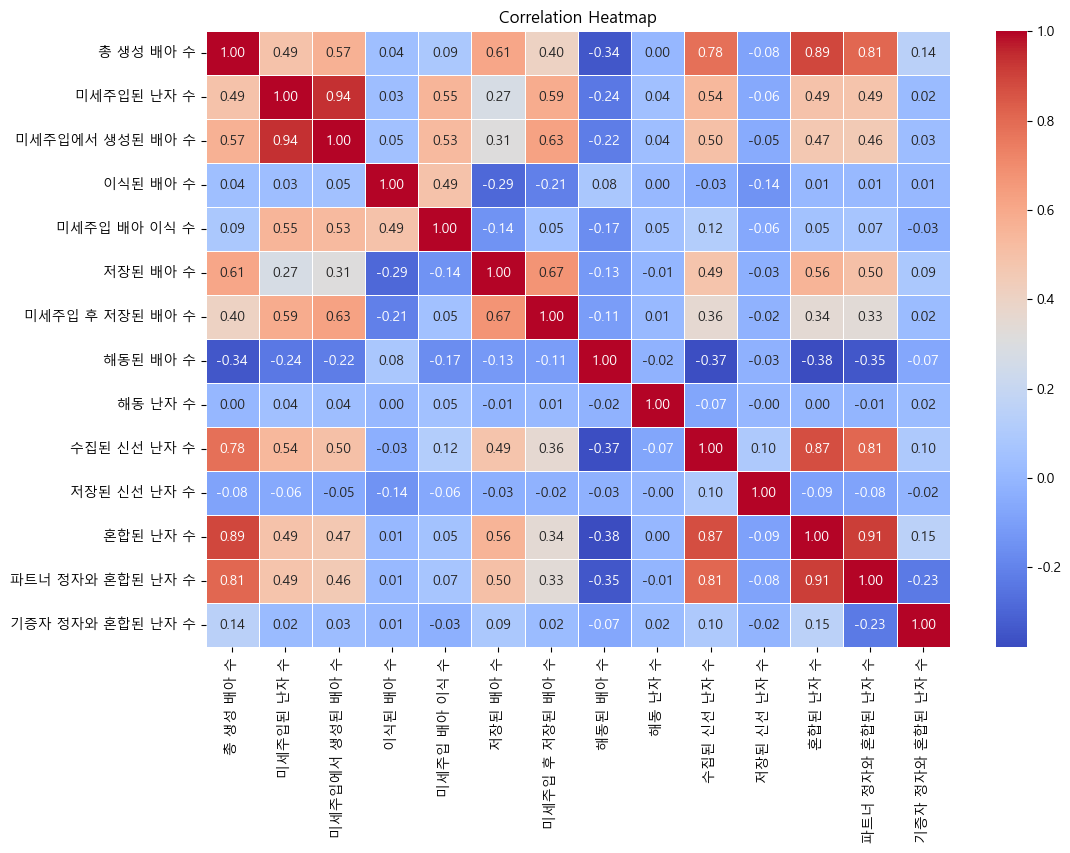

In [2780]:
target_columns = [
     '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수',
    '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수',
    '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
    '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수'
]

# 결측치 제거
filtered_data = train[target_columns].dropna()

# 상관계수 계산
corr_matrix = filtered_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [2781]:
train.drop(columns=['총 생성 배아 수', '혼합된 난자 수','미세주입에서 생성된 배아 수','수집된 신선 난자 수'],inplace=True)
test.drop(columns=['총 생성 배아 수', '혼합된 난자 수','미세주입에서 생성된 배아 수','수집된 신선 난자 수'],inplace=True)

총 생성 배아 수는 3개의 변수와 0.7 이상의 상관관계를 보이므로 삭제 ->

혼합된 난자 수도 2개의 변수와 0.7 이상의 상관관계 ->

미세주입에서 생성된 배아 수, 수집된 신선 난자 수 삭제

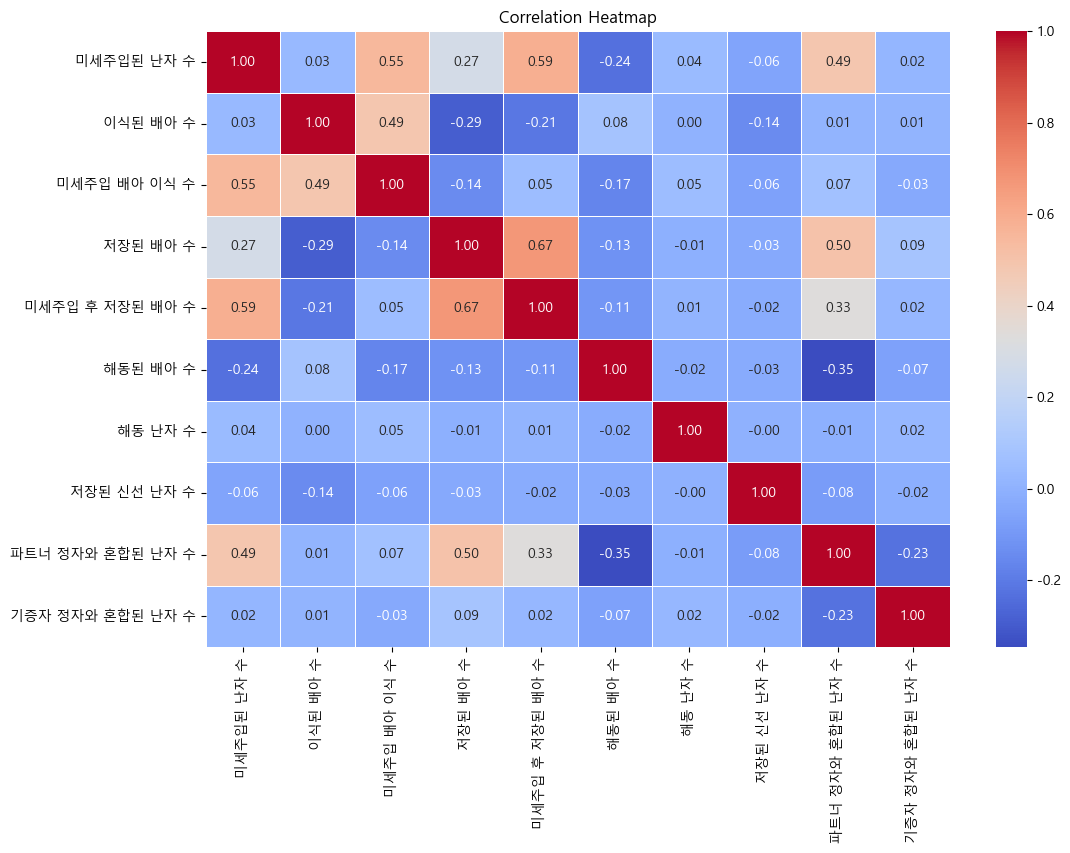

In [2783]:
target_columns = [
     '미세주입된 난자 수', '이식된 배아 수', '미세주입 배아 이식 수',
    '저장된 배아 수', '미세주입 후 저장된 배아 수','해동된 배아 수', '해동 난자 수', 
    '저장된 신선 난자 수','파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수'
]

# 결측치 제거
filtered_data = train[target_columns].dropna()

# 상관계수 계산
corr_matrix = filtered_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 미세주입 된 난자 수

In [2785]:
bins = [-1, 0, 5, 10, 20, train['미세주입된 난자 수'].max()]
labels = ['None', 'Low', 'Medium', 'High', 'Very High']
train['미세주입된 난자 그룹'] = pd.cut(train['미세주입된 난자 수'], bins=bins, labels=labels)
test['미세주입된 난자 그룹'] = pd.cut(test['미세주입된 난자 수'], bins=bins, labels=labels)

In [2786]:
a = pd.crosstab(train['미세주입된 난자 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['미세주입된 난자 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
미세주입된 난자 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,95657,32012,127669.0,0.749258,0.250742
Low,31971,7013,38984.0,0.820106,0.179894
Medium,33099,14440,47539.0,0.696249,0.303751
High,21110,11062,32172.0,0.656161,0.343839
Very High,2806,890,3696.0,0.759199,0.240801
All,190123,66228,256351.0,NaN,NaN


None: 0/ Low: 1-5 / Medium: 6-10 / High:11-20 / Very High:21+


In [2788]:
train['미세주입된 난자 그룹'] = train['미세주입된 난자 그룹'].fillna('Low')
test['미세주입된 난자 그룹'] = test['미세주입된 난자 그룹'].fillna('Low')

### 이식된 배아 수

In [2790]:
a = pd.crosstab(train['이식된 배아 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['이식된 배아 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
이식된 배아 수,,,,,
0.0,36514,30,36544.0,0.999179,0.000821
1.0,64383,29408,93791.0,0.686452,0.313548
2.0,76362,34483,110845.0,0.688908,0.311092
3.0,7384,1496,8880.0,0.831532,0.168468
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2791]:
train['이식된 배아 수'].fillna(train['이식된 배아 수'].median(), inplace=True)
test['이식된 배아 수'].fillna(test['이식된 배아 수'].median(), inplace=True)


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\2858610599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['이식된 배아 수'].fillna(train['이식된 배아 수'].median(), inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\2858610599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

중앙값으로 대체

### 미세주입 배아 이식 수

In [2794]:
a = pd.crosstab(train['미세주입 배아 이식 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['미세주입 배아 이식 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
미세주입 배아 이식 수,,,,,
0.0,107707,31067,138774.0,0.776132,0.223868
1.0,31629,14846,46475.0,0.680559,0.319441
2.0,41044,18641,59685.0,0.687677,0.312323
3.0,4263,863,5126.0,0.831643,0.168357
NaN,5480,811,NaN,0.871086,0.128914
All,190123,66228,256351.0,NaN,NaN


In [2795]:
train['미세주입 배아 이식 수'] = train['미세주입 배아 이식 수'].fillna(train['미세주입 배아 이식 수'].mode()[0])
test['미세주입 배아 이식 수'] = test['미세주입 배아 이식 수'].fillna(test['미세주입 배아 이식 수'].mode()[0])


임신 성공 확률도 다른 1,2보다 낮고, 최빈값인 0으로 대체

### 저장된 배아 수

In [2798]:
bins = [-1, 0, 5, 10, train['저장된 배아 수'].max()]
labels = ['None', 'Low', 'Medium', 'High']
train['저장된 배아 수 그룹'] = pd.cut(train['저장된 배아 수'], bins=bins, labels=labels)
test['저장된 배아 수 그룹'] = pd.cut(test['저장된 배아 수'], bins=bins, labels=labels)

In [2799]:
a = pd.crosstab(train['저장된 배아 수 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['저장된 배아 수 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
저장된 배아 수 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,129800,37066,166866.0,0.777870,0.222130
Low,44165,24811,68976.0,0.640295,0.359705
Medium,7706,3241,10947.0,0.703937,0.296063
High,2972,299,3271.0,0.908591,0.091409
All,190123,66228,256351.0,NaN,NaN


In [2800]:
train['저장된 배아 수 그룹'] = train['저장된 배아 수 그룹'].fillna(train['저장된 배아 수 그룹'].mode()[0])
test['저장된 배아 수 그룹'] = test['저장된 배아 수 그룹'].fillna(test['저장된 배아 수 그룹'].mode()[0])

### 미세주입 후 저장된 배아 수

In [2802]:
a = pd.crosstab(train['미세주입 후 저장된 배아 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['미세주입 후 저장된 배아 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
미세주입 후 저장된 배아 수,,,,,
0.0,154426,49868,204294.0,0.755901,0.244099
1.0,8065,4276,12341.0,0.653513,0.346487
2.0,7092,4259,11351.0,0.624791,0.375209
3.0,4708,2722,7430.0,0.633647,0.366353
4.0,3146,1726,4872.0,0.645731,0.354269
5.0,1983,1039,3022.0,0.656188,0.343812
6.0,1305,633,1938.0,0.673375,0.326625
7.0,949,330,1279.0,0.741986,0.258014
8.0,648,226,874.0,0.741419,0.258581


In [2803]:
bins = [-1, 0, 5, 10, train['미세주입 후 저장된 배아 수'].max()]
labels = ['None', 'Low', 'Medium', 'High']
train['미세주입 후 저장된 배아 그룹'] = pd.cut(train['미세주입 후 저장된 배아 수'], bins=bins, labels=labels)
test['미세주입 후 저장된 배아 그룹'] = pd.cut(test['미세주입 후 저장된 배아 수'], bins=bins, labels=labels)

In [2804]:
a = pd.crosstab(train['미세주입 후 저장된 배아 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['미세주입 후 저장된 배아 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
미세주입 후 저장된 배아 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,154426,49868,204294.0,0.755901,0.244099
Low,24994,14022,39016.0,0.640609,0.359391
Medium,3764,1411,5175.0,0.727343,0.272657
High,1459,116,1575.0,0.926349,0.073651
All,190123,66228,256351.0,NaN,NaN


In [2805]:
train['미세주입 후 저장된 배아 그룹'] = train['미세주입 후 저장된 배아 그룹'].fillna(train['미세주입 후 저장된 배아 그룹'].mode()[0])
test['미세주입 후 저장된 배아 그룹'] = test['미세주입 후 저장된 배아 그룹'].fillna(test['미세주입 후 저장된 배아 그룹'].mode()[0])

### 해동된 배아 수

In [2807]:
a = pd.crosstab(train['해동된 배아 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['해동된 배아 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
해동된 배아 수,,,,,
0.0,153486,56189,209675.0,0.732019,0.267981
1.0,10245,2811,13056.0,0.784697,0.215303
2.0,9192,2883,12075.0,0.761242,0.238758
3.0,4288,1106,5394.0,0.794957,0.205043
4.0,2688,764,3452.0,0.778679,0.221321
5.0,1484,453,1937.0,0.766133,0.233867
6.0,1128,371,1499.0,0.752502,0.247498
7.0,622,197,819.0,0.759463,0.240537
8.0,525,226,751.0,0.699068,0.300932


In [2808]:
bins = [-1, 0, 5, train['해동된 배아 수'].max()]
labels = ['None', 'Low','High']
train['해동된 배아 그룹'] = pd.cut(train['해동된 배아 수'], bins=bins, labels=labels)
test['해동된 배아 그룹'] = pd.cut(test['해동된 배아 수'], bins=bins, labels=labels)

In [2809]:
a = pd.crosstab(train['해동된 배아 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['해동된 배아 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
해동된 배아 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,153486,56189,209675.0,0.732019,0.267981
Low,27897,8017,35914.0,0.776772,0.223228
High,3260,1211,4471.0,0.729143,0.270857
All,190123,66228,256351.0,NaN,NaN


In [2810]:
train['해동된 배아 그룹'] = train['해동된 배아 그룹'].fillna(train['해동된 배아 그룹'].mode()[0])
test['해동된 배아 그룹'] = test['해동된 배아 그룹'].fillna(test['해동된 배아 그룹'].mode()[0])

### 해동 난자 수

In [2812]:
a = pd.crosstab(train['해동 난자 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['해동 난자 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
해동 난자 수,,,,,
0.0,183519,65096,248615.0,0.738165,0.261835
1.0,24,2,26.0,0.923077,0.076923
2.0,59,6,65.0,0.907692,0.092308
3.0,59,6,65.0,0.907692,0.092308
4.0,116,14,130.0,0.892308,0.107692
5.0,92,15,107.0,0.859813,0.140187
6.0,137,34,171.0,0.801170,0.198830
7.0,102,41,143.0,0.713287,0.286713
8.0,154,65,219.0,0.703196,0.296804


In [2813]:
train.drop(columns='해동 난자 수',inplace=True)
test.drop(columns='해동 난자 수',inplace=True)

### 저장된 신선 난자 수

In [2815]:
a = pd.crosstab(train['저장된 신선 난자 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['저장된 신선 난자 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
저장된 신선 난자 수,,,,,
0.0,182020,65374,247394.0,0.735749,0.264251
1.0,141,4,145.0,0.972414,0.027586
2.0,187,2,189.0,0.989418,0.010582
3.0,198,3,201.0,0.985075,0.014925
4.0,200,4,204.0,0.980392,0.019608
5.0,211,6,217.0,0.972350,0.027650
6.0,210,4,214.0,0.981308,0.018692
7.0,176,4,180.0,0.977778,0.022222
8.0,182,1,183.0,0.994536,0.005464


In [2816]:
train.drop(columns='저장된 신선 난자 수',inplace=True)
test.drop(columns='저장된 신선 난자 수',inplace=True)

### 파트너 정자와 혼합된 난자 수

In [2818]:
a = pd.crosstab(train['파트너 정자와 혼합된 난자 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['파트너 정자와 혼합된 난자 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
파트너 정자와 혼합된 난자 수,,,,,
0.0,49238,13683,62921.0,0.782537,0.217463
1.0,5375,347,5722.0,0.939357,0.060643
2.0,7207,870,8077.0,0.892287,0.107713
3.0,8464,1639,10103.0,0.837771,0.162229
4.0,9891,2525,12416.0,0.796633,0.203367
5.0,10687,3542,14229.0,0.751072,0.248928
6.0,11070,3942,15012.0,0.737410,0.262590
7.0,10545,4161,14706.0,0.717054,0.282946
8.0,9829,4241,14070.0,0.698579,0.301421


In [2819]:
bins = [-1, 0, 5, 10, 15, train['파트너 정자와 혼합된 난자 수'].max()]
labels = ['None', 'Low','Medium','High','Very High']
train['파트너 정자와 혼합된 난자 그룹'] = pd.cut(train['파트너 정자와 혼합된 난자 수'], bins=bins, labels=labels)
test['파트너 정자와 혼합된 난자 그룹'] = pd.cut(test['파트너 정자와 혼합된 난자 수'], bins=bins, labels=labels)

In [2820]:
a = pd.crosstab(train['파트너 정자와 혼합된 난자 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['파트너 정자와 혼합된 난자 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
파트너 정자와 혼합된 난자 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,49238,13683,62921.0,0.782537,0.217463
Low,41624,8923,50547.0,0.823471,0.176529
Medium,48569,20291,68860.0,0.705330,0.294670
High,27136,14141,41277.0,0.657412,0.342588
Very High,18076,8379,26455.0,0.683273,0.316727
All,190123,66228,256351.0,NaN,NaN


In [2821]:
train['파트너 정자와 혼합된 난자 그룹'].fillna('Low', inplace=True)
test['파트너 정자와 혼합된 난자 그룹'].fillna('Low', inplace=True)


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\1198643911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['파트너 정자와 혼합된 난자 그룹'].fillna('Low', inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\1198643911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### 기증자 정자와 혼합된 난자 수

In [2823]:
a = pd.crosstab(train['기증자 정자와 혼합된 난자 수'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['기증자 정자와 혼합된 난자 수'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
기증자 정자와 혼합된 난자 수,,,,,
0.0,173459,61087,234546.0,0.739552,0.260448
1.0,692,46,738.0,0.937669,0.062331
2.0,773,98,871.0,0.887486,0.112514
3.0,824,162,986.0,0.835700,0.164300
4.0,927,276,1203.0,0.770574,0.229426
5.0,963,341,1304.0,0.738497,0.261503
6.0,978,388,1366.0,0.715959,0.284041
7.0,868,388,1256.0,0.691083,0.308917
8.0,807,359,1166.0,0.692110,0.307890


In [2824]:
bins = [-1, 0, 5, 10, train['기증자 정자와 혼합된 난자 수'].max()]
labels = ['None', 'Low','Medium','High']
train['기증자 정자와 혼합된 난자 그룹'] = pd.cut(train['기증자 정자와 혼합된 난자 수'], bins=bins, labels=labels)
test['기증자 정자와 혼합된 난자 그룹'] = pd.cut(test['기증자 정자와 혼합된 난자 수'], bins=bins, labels=labels)

In [2825]:
a = pd.crosstab(train['기증자 정자와 혼합된 난자 그룹'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['기증자 정자와 혼합된 난자 그룹'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
기증자 정자와 혼합된 난자 그룹,,,,,
NaN,5480,811,NaN,0.871086,0.128914
None,173459,61087,234546.0,0.739552,0.260448
Low,4179,923,5102.0,0.819091,0.180909
Medium,3936,1795,5731.0,0.686791,0.313209
High,3069,1612,4681.0,0.655629,0.344371
All,190123,66228,256351.0,NaN,NaN


In [2826]:
train['기증자 정자와 혼합된 난자 그룹'].fillna('None', inplace=True)
test['기증자 정자와 혼합된 난자 그룹'].fillna('None', inplace=True)

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\776900728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['기증자 정자와 혼합된 난자 그룹'].fillna('None', inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_18584\776900728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [2827]:
test_missing_values = test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]  # 결측치가 있는 열만 필터링

print(test_missing_columns)

배아 생성 주요 이유         2176
미세주입된 난자 수          2176
저장된 배아 수            2176
미세주입 후 저장된 배아 수     2176
해동된 배아 수            2176
파트너 정자와 혼합된 난자 수    2176
기증자 정자와 혼합된 난자 수    2176
dtype: int64


### 배아 생성 주요 이유

In [2829]:
a = pd.crosstab(train['배아 생성 주요 이유'], train['임신 성공 여부'], margins=True, dropna=False)
b = pd.crosstab(train['배아 생성 주요 이유'], train['임신 성공 여부'], normalize='index', dropna=False)
pd.concat([a, b], axis=1)

임신 성공 여부,0,1,All,0,1
배아 생성 주요 이유,,,,,
기증용,1108,0,1108.0,1.000000,0.000000
"기증용, 난자 저장용",44,0,44.0,1.000000,0.000000
"기증용, 배아 저장용",125,0,125.0,1.000000,0.000000
"기증용, 배아 저장용, 현재 시술용",13,7,20.0,0.650000,0.350000
"기증용, 현재 시술용",2347,1437,3784.0,0.620243,0.379757
난자 저장용,1959,0,1959.0,1.000000,0.000000
"난자 저장용, 배아 저장용",6,0,6.0,1.000000,0.000000
"난자 저장용, 배아 저장용, 연구용",1,0,1.0,1.000000,0.000000
"난자 저장용, 현재 시술용",4,1,5.0,0.800000,0.200000


In [2830]:
train.drop(columns='배아 생성 주요 이유', inplace=True)
test.drop(columns='배아 생성 주요 이유', inplace=True)

In [2831]:
train.drop(columns=['미세주입된 난자 수','저장된 배아 수','미세주입 후 저장된 배아 수','해동된 배아 수',
                    '파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수'], inplace=True)
test.drop(columns=['미세주입된 난자 수','저장된 배아 수','미세주입 후 저장된 배아 수','해동된 배아 수',
                    '파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수'], inplace=True)

In [2832]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ID                 256351 non-null  object  
 1   시술 시기 코드           256351 non-null  object  
 2   시술 당시 나이           256351 non-null  object  
 3   시술 유형              256351 non-null  object  
 4   특정 시술 유형           256351 non-null  object  
 5   배란 자극 여부           256351 non-null  int64   
 6   단일 배아 이식 여부        256351 non-null  float64 
 7   착상 전 유전 진단 사용 여부   256351 non-null  float64 
 8   남성 주 불임 원인         256351 non-null  int64   
 9   남성 부 불임 원인         256351 non-null  int64   
 10  여성 주 불임 원인         256351 non-null  int64   
 11  여성 부 불임 원인         256351 non-null  int64   
 12  부부 주 불임 원인         256351 non-null  int64   
 13  부부 부 불임 원인         256351 non-null  int64   
 14  불임 원인 - 남성 요인      256351 non-null  int64   
 15  불임 원인 - 배란 장애      256351 non-null

## 인코딩

In [2834]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2835]:
# object 타입의 컬럼들만 선택하여 unique 값 확인
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col} 컬럼의 고유값:")
    print(train[col].value_counts())
    print("="*50)


ID 컬럼의 고유값:
ID
TRAIN_000000    1
TRAIN_170906    1
TRAIN_170893    1
TRAIN_170894    1
TRAIN_170895    1
               ..
TRAIN_085455    1
TRAIN_085456    1
TRAIN_085457    1
TRAIN_085458    1
TRAIN_256350    1
Name: count, Length: 256351, dtype: int64

시술 시기 코드 컬럼의 고유값:
시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

시술 당시 나이 컬럼의 고유값:
시술 당시 나이
만18-34세     102476
만35-37세      57780
만38-39세      39247
만40-42세      37348
만43-44세      12253
만45-50세       6918
만 43-44세       329
Name: count, dtype: int64

시술 유형 컬럼의 고유값:
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

특정 시술 유형 컬럼의 고유값:
특정 시술 유형
ICSI                  125762
IVF                    93393
Unknown                26941
IUI                     6100
ICSI / BLASTOCYST       1614
IVF / BLASTOCYST        1248
ICSI / AH                771
IVF / AH                 321
기타                       201
Name: count, dtype: int64


In [2836]:
categorical_columns = train.select_dtypes(include=['category']).columns

for col in categorical_columns:
    print(f"\n{col} 컬럼의 고유값:")
    print(train[col].value_counts())
    print("="*50)


미세주입된 난자 그룹 컬럼의 고유값:
미세주입된 난자 그룹
None         127669
Medium        47539
Low           45275
High          32172
Very High      3696
Name: count, dtype: int64

저장된 배아 수 그룹 컬럼의 고유값:
저장된 배아 수 그룹
None      173157
Low        68976
Medium     10947
High        3271
Name: count, dtype: int64

미세주입 후 저장된 배아 그룹 컬럼의 고유값:
미세주입 후 저장된 배아 그룹
None      210585
Low        39016
Medium      5175
High        1575
Name: count, dtype: int64

해동된 배아 그룹 컬럼의 고유값:
해동된 배아 그룹
None    215966
Low      35914
High      4471
Name: count, dtype: int64

파트너 정자와 혼합된 난자 그룹 컬럼의 고유값:
파트너 정자와 혼합된 난자 그룹
Medium       68860
None         62921
Low          56838
High         41277
Very High    26455
Name: count, dtype: int64

기증자 정자와 혼합된 난자 그룹 컬럼의 고유값:
기증자 정자와 혼합된 난자 그룹
None      240837
Medium      5731
Low         5102
High        4681
Name: count, dtype: int64


In [2837]:
train.drop(columns=['난자 기증자 나이','정자 기증자 나이'],inplace=True)
test.drop(columns=['난자 기증자 나이','정자 기증자 나이'],inplace=True)

In [2838]:
label_columns=['시술 당시 나이','총 시술 횟수','IVF 시술 횟수','DI 시술 횟수','총 임신 횟수','IVF 임신 횟수','DI 임신 횟수','총 출산 횟수','IVF 출산 횟수',
               'DI 출산 횟수','배아 이식 경과일','미세주입된 난자 그룹','저장된 배아 수 그룹','미세주입 후 저장된 배아 그룹','해동된 배아 그룹',
              '파트너 정자와 혼합된 난자 그룹','기증자 정자와 혼합된 난자 그룹']

onehot_columns=['시술 시기 코드','시술 유형','특정 시술 유형','난자 출처','정자 출처','난자 혼합 경과일']

In [2839]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩 수행
for col in label_columns:
    le = LabelEncoder()
    # 해당 컬럼의 값을 문자열로 변환 후 라벨 인코딩 진행
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.fit_transform(test[col].astype(str))

print("✅ 모든 변수에 대해 라벨 인코딩 완료!")



✅ 모든 변수에 대해 라벨 인코딩 완료!


In [2840]:
from sklearn.preprocessing import OneHotEncoder

# 원-핫 인코딩이 필요한 변수 목록
onehot_columns = ['시술 시기 코드', '시술 유형', '특정 시술 유형', '난자 출처', '정자 출처', '난자 혼합 경과일']

# 원-핫 인코딩을 적용하기 전에 모든 값이 문자열인지 확인하고 변환
for col in onehot_columns:
    train[col] = train[col].astype(str)

# OneHotEncoder 설정
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 원핫 인코딩 수행
onehot_encoded = ohe.fit_transform(train[onehot_columns])

# 원-핫 인코딩된 특성들의 이름을 확인
onehot_feature_names = ohe.get_feature_names_out(input_features=onehot_columns)

# 원-핫 인코딩된 데이터 확인
print(f"One-hot encoded shape: {onehot_encoded.shape}")
print(f"Feature names length: {len(onehot_feature_names)}")

# DataFrame으로 변환
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=train.index)

# 기존 train 데이터에서 원핫 인코딩한 변수 제거 후 새로운 데이터프레임과 결합
train = train.drop(columns=onehot_columns).join(onehot_df)

print("✅ 원-핫 인코딩 완료!")


One-hot encoded shape: (256351, 26)
Feature names length: 26
✅ 원-핫 인코딩 완료!


In [2841]:
from sklearn.preprocessing import OneHotEncoder

# 원-핫 인코딩이 필요한 변수 목록
onehot_columns = ['시술 시기 코드', '시술 유형', '특정 시술 유형', '난자 출처', '정자 출처', '난자 혼합 경과일']

# 원-핫 인코딩을 적용하기 전에 모든 값이 문자열인지 확인하고 변환
for col in onehot_columns:
    test[col] = test[col].astype(str)

# OneHotEncoder 설정
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 원핫 인코딩 수행
onehot_encoded = ohe.fit_transform(test[onehot_columns])

# 원-핫 인코딩된 특성들의 이름을 확인
onehot_feature_names = ohe.get_feature_names_out(input_features=onehot_columns)

# 원-핫 인코딩된 데이터 확인
print(f"One-hot encoded shape: {onehot_encoded.shape}")
print(f"Feature names length: {len(onehot_feature_names)}")

# DataFrame으로 변환
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=test.index)

# 기존 test 데이터에서 원핫 인코딩한 변수 제거 후 새로운 데이터프레임과 결합
test = test.drop(columns=onehot_columns).join(onehot_df)

print("✅ 원-핫 인코딩 완료!")


One-hot encoded shape: (90067, 26)
Feature names length: 26
✅ 원-핫 인코딩 완료!


In [2842]:
train.drop(columns='ID',inplace=True)

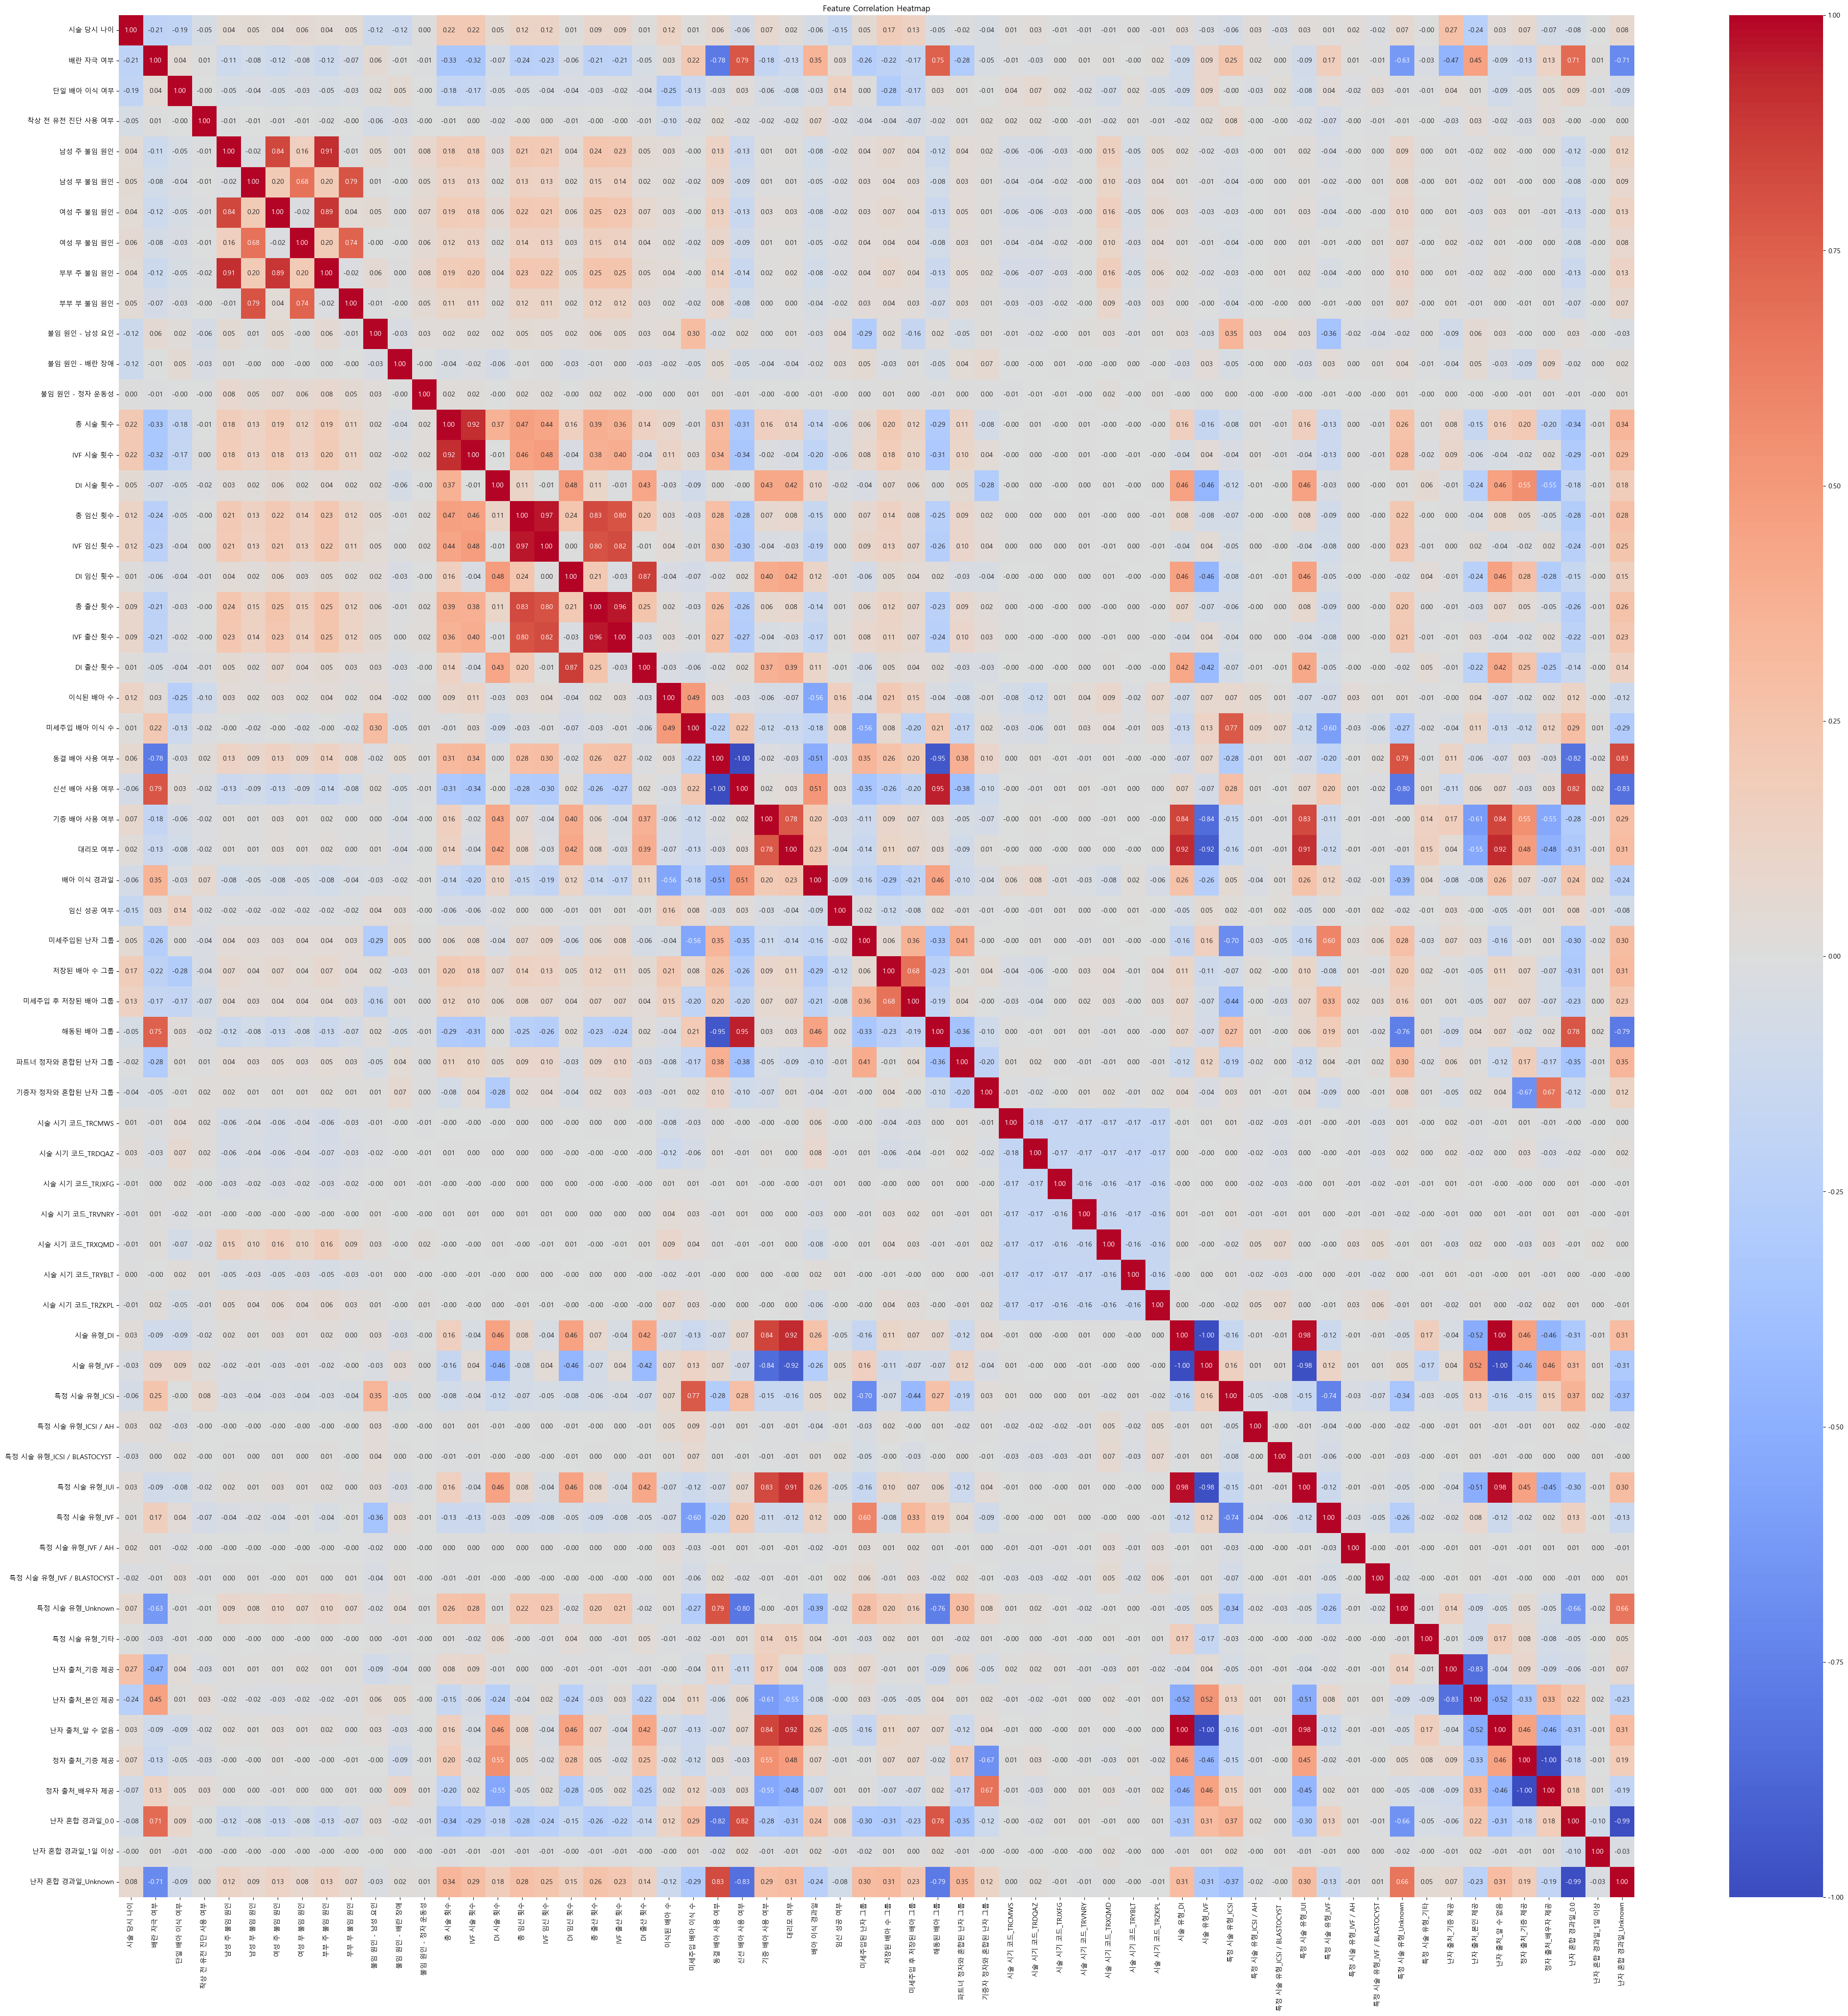

In [2843]:
correlation_matrix = train.corr()

plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [2844]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.7 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.7 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars > 0.7]  # 0.7 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.7 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f"'{var}': {related_vars[var]:.2f}" for var in related_vars.index])}")


배란 자극 여부: '신선 배아 사용 여부': 0.79, '해동된 배아 그룹': 0.75, '난자 혼합 경과일_0.0': 0.71
남성 주 불임 원인: '여성 주 불임 원인': 0.84, '부부 주 불임 원인': 0.91
남성 부 불임 원인: '부부 부 불임 원인': 0.79
여성 주 불임 원인: '남성 주 불임 원인': 0.84, '부부 주 불임 원인': 0.89
여성 부 불임 원인: '부부 부 불임 원인': 0.74
부부 주 불임 원인: '남성 주 불임 원인': 0.91, '여성 주 불임 원인': 0.89
부부 부 불임 원인: '남성 부 불임 원인': 0.79, '여성 부 불임 원인': 0.74
총 시술 횟수: 'IVF 시술 횟수': 0.92
IVF 시술 횟수: '총 시술 횟수': 0.92
총 임신 횟수: 'IVF 임신 횟수': 0.97, '총 출산 횟수': 0.83, 'IVF 출산 횟수': 0.80
IVF 임신 횟수: '총 임신 횟수': 0.97, '총 출산 횟수': 0.80, 'IVF 출산 횟수': 0.82
DI 임신 횟수: 'DI 출산 횟수': 0.87
총 출산 횟수: '총 임신 횟수': 0.83, 'IVF 임신 횟수': 0.80, 'IVF 출산 횟수': 0.96
IVF 출산 횟수: '총 임신 횟수': 0.80, 'IVF 임신 횟수': 0.82, '총 출산 횟수': 0.96
DI 출산 횟수: 'DI 임신 횟수': 0.87
미세주입 배아 이식 수: '특정 시술 유형_ICSI': 0.77
동결 배아 사용 여부: '특정 시술 유형_Unknown': 0.79, '난자 혼합 경과일_Unknown': 0.83
신선 배아 사용 여부: '배란 자극 여부': 0.79, '해동된 배아 그룹': 0.95, '난자 혼합 경과일_0.0': 0.82
기증 배아 사용 여부: '대리모 여부': 0.78, '시술 유형_DI': 0.84, '특정 시술 유형_IUI': 0.83, '난자 출처_알 수 없음': 0.84
대리모 여부: '기증 배아 사용 여부': 0.78, '시술 유형_DI'

In [2845]:
train.drop(columns='총 임신 횟수',inplace=True)
test.drop(columns='총 임신 횟수',inplace=True)

In [2846]:
train.drop(columns=['배란 자극 여부','부부 주 불임 원인'],inplace=True)
test.drop(columns=['배란 자극 여부','부부 주 불임 원인'],inplace=True)

In [2847]:
train.drop(columns=['기증 배아 사용 여부','대리모 여부'],inplace=True)
test.drop(columns=['기증 배아 사용 여부','대리모 여부'],inplace=True)

In [2848]:
train.drop(columns=['부부 부 불임 원인','IVF 출산 횟수','특정 시술 유형_IUI','신선 배아 사용 여부','IVF 시술 횟수'],inplace=True)
test.drop(columns=['부부 부 불임 원인','IVF 출산 횟수','특정 시술 유형_IUI','신선 배아 사용 여부','IVF 시술 횟수'],inplace=True)

In [3065]:
pip install xgboost


  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [3068]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

# 타겟 변수와 피처 변수 분리
X = train.drop(columns=['임신 성공 여부'])
y = train['임신 성공 여부']

# 데이터셋을 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 모델 리스트 생성
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# 모델 학습 및 성능 평가
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    # 예측 및 평가
    y_pred = model.predict(X_valid_scaled)
    y_pred_prob = model.predict_proba(X_valid_scaled)[:, 1]
    
    accuracy = accuracy_score(y_valid, y_pred)
    auc = roc_auc_score(y_valid, y_pred_prob)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")


Logistic Regression - Accuracy: 0.7405, AUC: 0.7055
Random Forest - Accuracy: 0.7111, AUC: 0.6790


C:\Users\jeongbin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7462, AUC: 0.7331
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051521
[LightGBM] [Info] Start training from score -1.051521
LightGBM - Accuracy: 0.7465, AUC: 0.7360


In [3094]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 모델 정의
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_valid_scaled)
y_pred_proba = model.predict_proba(X_valid_scaled)[:, 1]

# 평가
accuracy = accuracy_score(y_valid, y_pred)
auc = roc_auc_score(y_valid, y_pred_proba)

print(f"LightGBM - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051521
[LightGBM] [Info] Start training from score -1.051521
LightGBM - Accuracy: 0.7465, AUC: 0.7360


In [3078]:
test_c=test.copy()
test.drop(columns=['ID'], inplace=True)


In [3096]:
pred = model.predict_proba(test)[:, 1]  # 클래스 1(임신 성공) 확률만 선택
test_c['probability'] = pred

In [3098]:
test_c = test_c[['ID', 'probability']]

In [3100]:
test_c.head()

,ID,probability
0,TEST_00000,0.078855
1,TEST_00001,0.105403
2,TEST_00002,0.044027
3,TEST_00003,0.037647
4,TEST_00004,0.095405


In [3104]:
test_c.to_csv('predictions4.csv', index=False)